### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [3]:
tienda["Precio"].sum()
tienda2["Precio"].sum()
tienda3["Precio"].sum()
tienda4["Precio"].sum()

print(tienda["Precio"].sum())
print(tienda2["Precio"].sum())
print(tienda3["Precio"].sum())
print(tienda4["Precio"].sum())


1150880400.0
1116343500.0
1098019600.0
1038375700.0


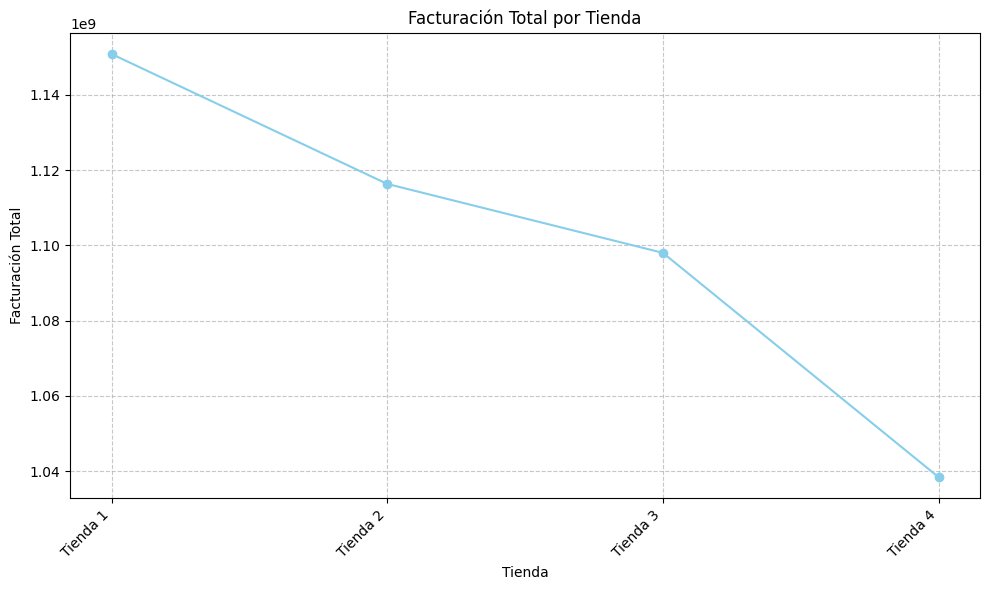

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

total_revenue = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

revenue_series = pd.Series(total_revenue)

plt.figure(figsize=(10, 6))
plt.plot(revenue_series.index, revenue_series.values, marker='o', linestyle='-', color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [4]:
print("Cantidad de productos vendidos por categoría - Tienda 1 (ordenado por ventas):")
print(tienda.groupby("Categoría del Producto").size().sort_values(ascending=False))
print("\nCantidad de productos vendidos por categoría - Tienda 2 (ordenado por ventas):")
print(tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False))
print("\nCantidad de productos vendidos por categoría - Tienda 3 (ordenado por ventas):")
print(tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False))
print("\nCantidad de productos vendidos por categoría - Tienda 4 (ordenado por ventas):")
print(tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False))

Cantidad de productos vendidos por categoría - Tienda 1 (ordenado por ventas):
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Cantidad de productos vendidos por categoría - Tienda 2 (ordenado por ventas):
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Cantidad de productos vendidos por categoría - Tienda 3 (ordenado por ventas):
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros         

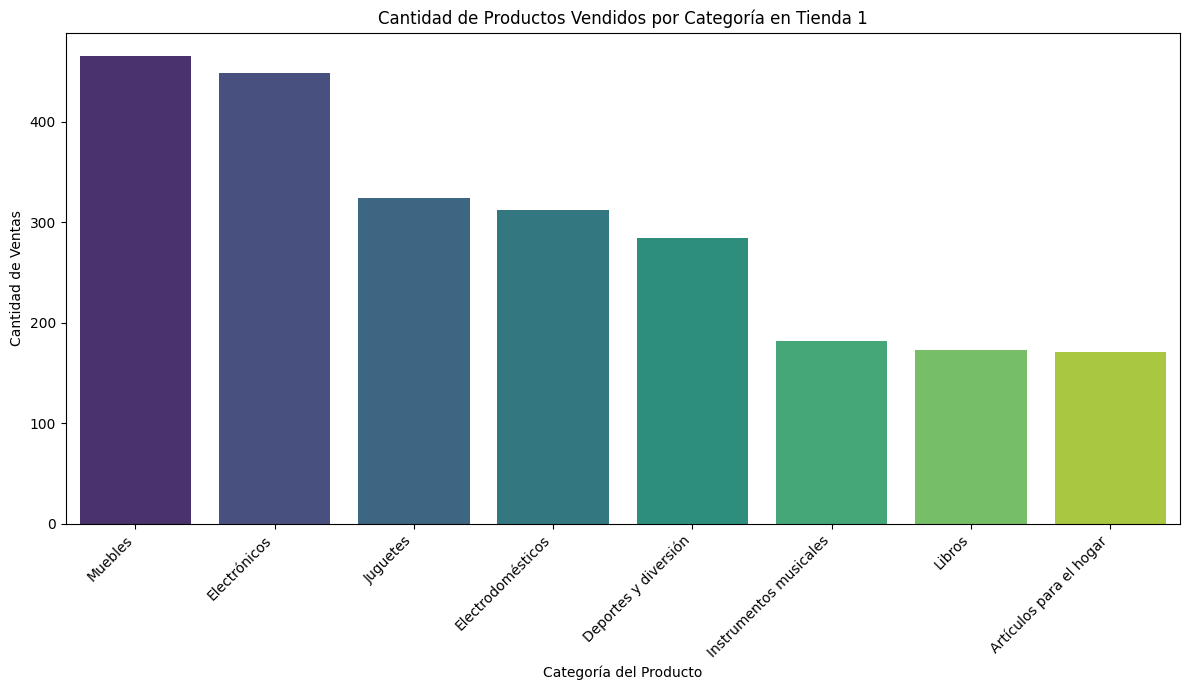

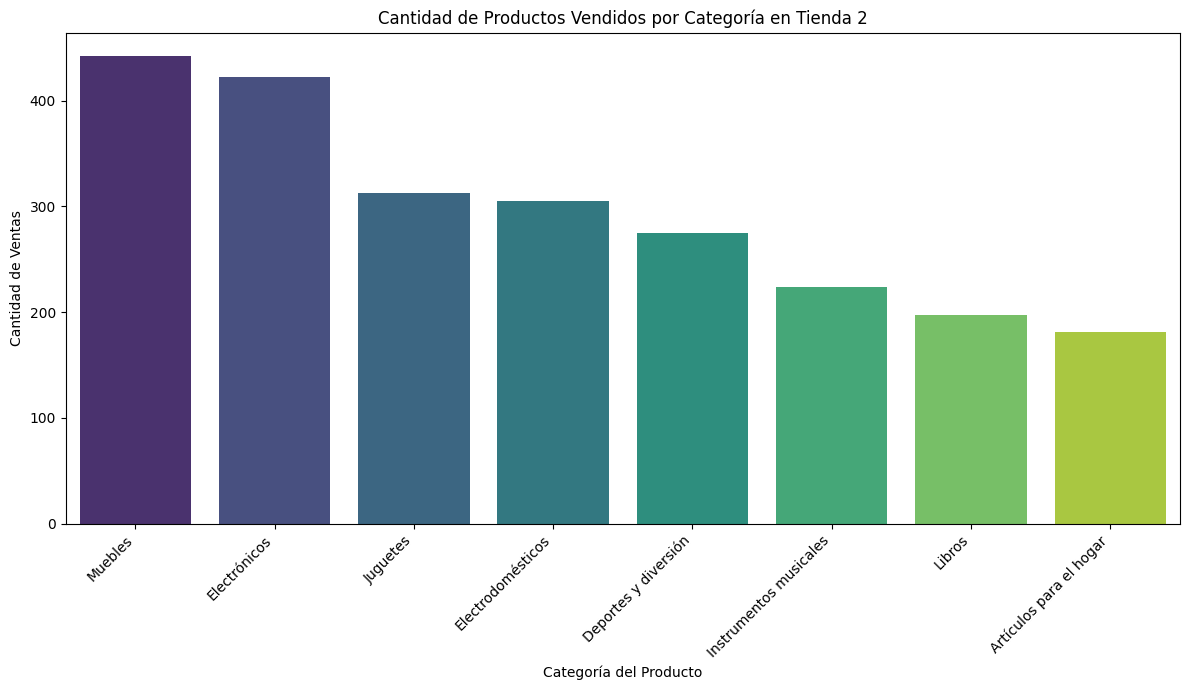

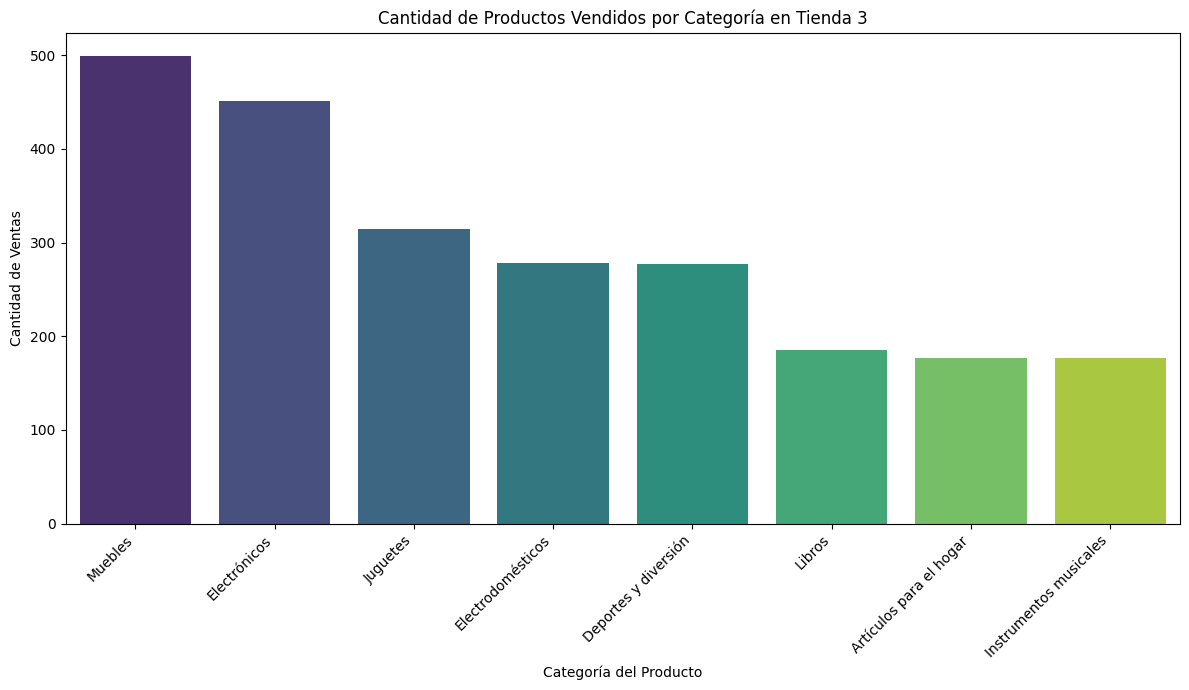

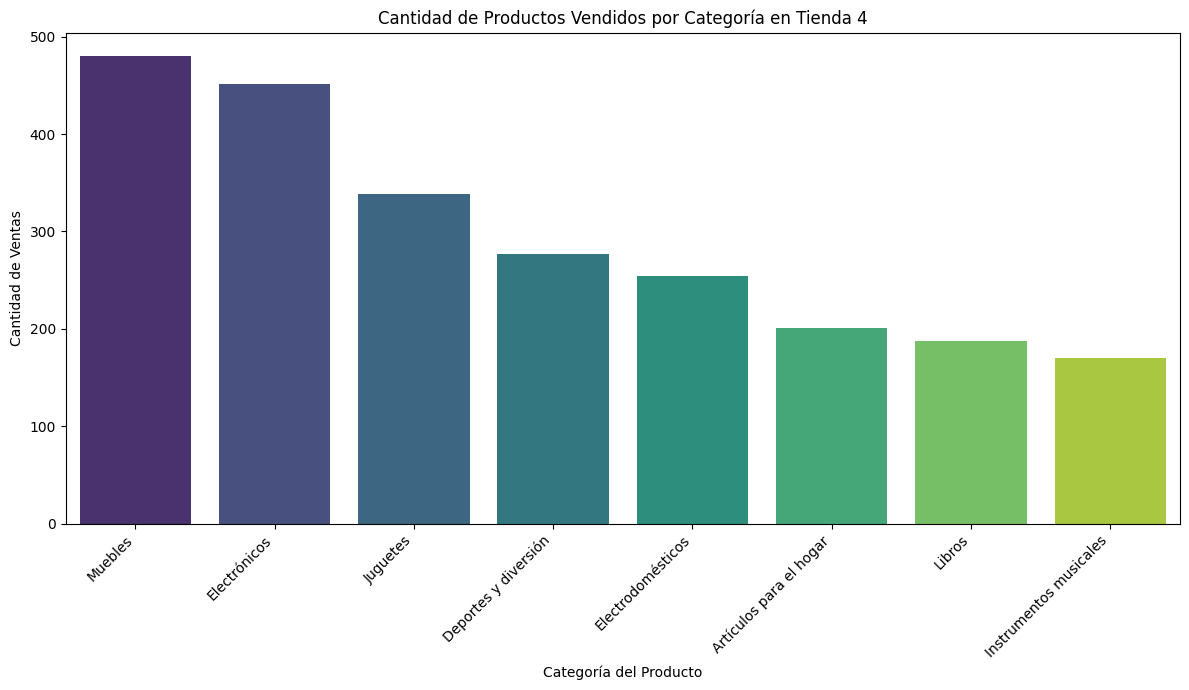

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_by_category(df, store_name):
    category_sales = df.groupby("Categoría del Producto").size().sort_values(ascending=False)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis', hue=category_sales.index, legend=False)
    plt.title(f'Cantidad de Productos Vendidos por Categoría en {store_name}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_sales_by_category(tienda, "Tienda 1")
plot_sales_by_category(tienda2, "Tienda 2")
plot_sales_by_category(tienda3, "Tienda 3")
plot_sales_by_category(tienda4, "Tienda 4")

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [13]:
print(f"Calificación promedio - Tienda 1: {tienda['Calificación'].mean():.2f}")
print(f"Calificación promedio - Tienda 2: {tienda2['Calificación'].mean():.2f}")
print(f"Calificación promedio - Tienda 3: {tienda3['Calificación'].mean():.2f}")
print(f"Calificación promedio - Tienda 4: {tienda4['Calificación'].mean():.2f}")

Calificación promedio - Tienda 1: 3.98
Calificación promedio - Tienda 2: 4.04
Calificación promedio - Tienda 3: 4.05
Calificación promedio - Tienda 4: 4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


--- Tienda 1 ---
Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


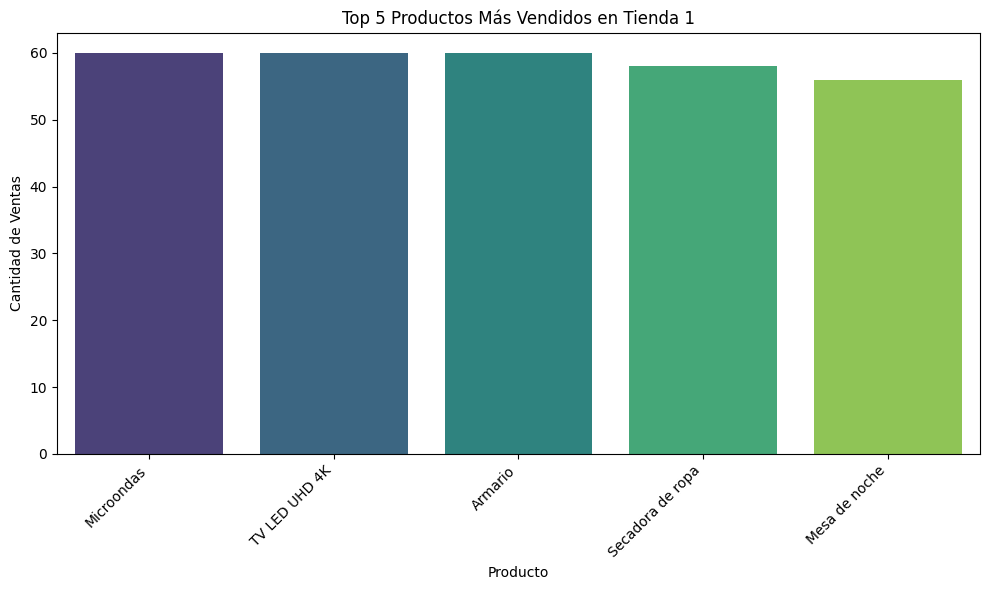


--- Tienda 2 ---
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


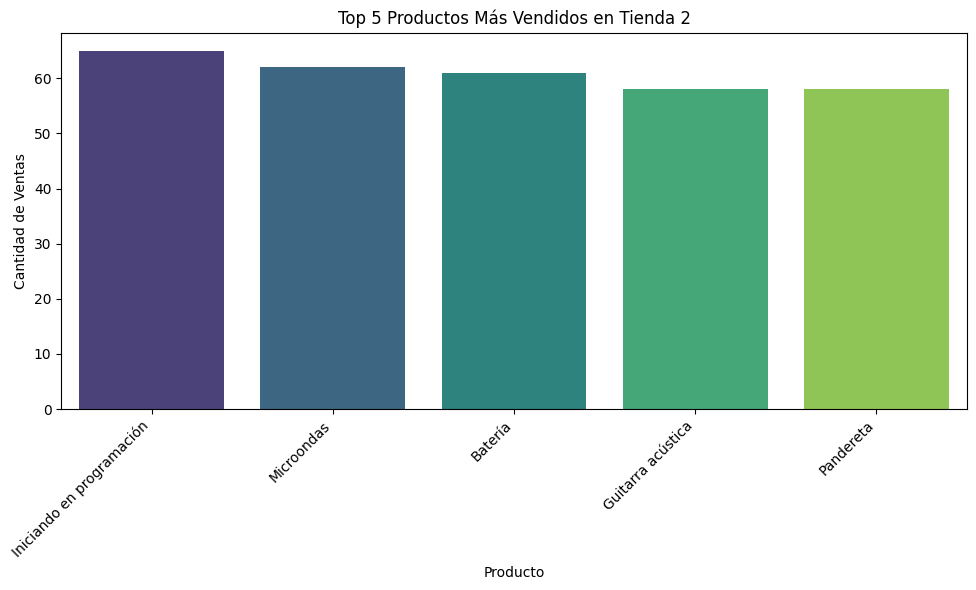


--- Tienda 3 ---
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Productos menos vendidos:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


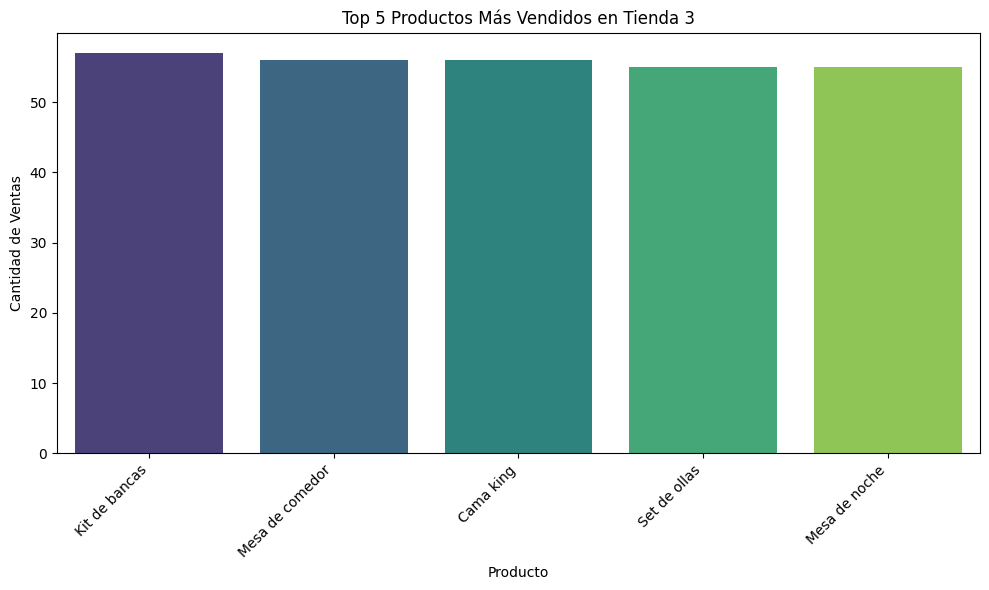


--- Tienda 4 ---
Productos más vendidos:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Productos menos vendidos:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


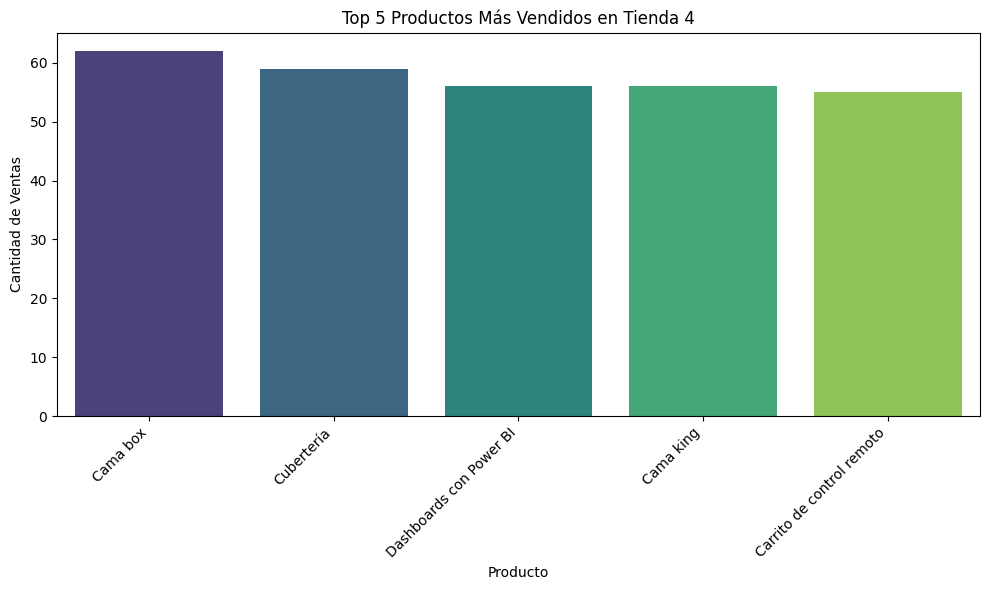

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

def get_top_and_bottom_products(df, store_name, n=5):
    product_counts = df['Producto'].value_counts()
    most_sold = product_counts.head(n)
    least_sold = product_counts.tail(n)

    print(f"\n--- {store_name} ---")
    print("Productos más vendidos:")
    print(most_sold)
    print("\nProductos menos vendidos:")
    print(least_sold)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=most_sold.index, y=most_sold.values, palette='viridis', hue=most_sold.index, legend=False)
    plt.title(f'Top {n} Productos Más Vendidos en {store_name}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

get_top_and_bottom_products(tienda, "Tienda 1")
get_top_and_bottom_products(tienda2, "Tienda 2")
get_top_and_bottom_products(tienda3, "Tienda 3")
get_top_and_bottom_products(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [15]:
print(f"Costo de envío promedio - Tienda 1: {tienda['Costo de envío'].mean():.2f}")
print(f"Costo de envío promedio - Tienda 2: {tienda2['Costo de envío'].mean():.2f}")
print(f"Costo de envío promedio - Tienda 3: {tienda3['Costo de envío'].mean():.2f}")
print(f"Costo de envío promedio - Tienda 4: {tienda4['Costo de envío'].mean():.2f}")

Costo de envío promedio - Tienda 1: 26018.61
Costo de envío promedio - Tienda 2: 25216.24
Costo de envío promedio - Tienda 3: 24805.68
Costo de envío promedio - Tienda 4: 23459.46


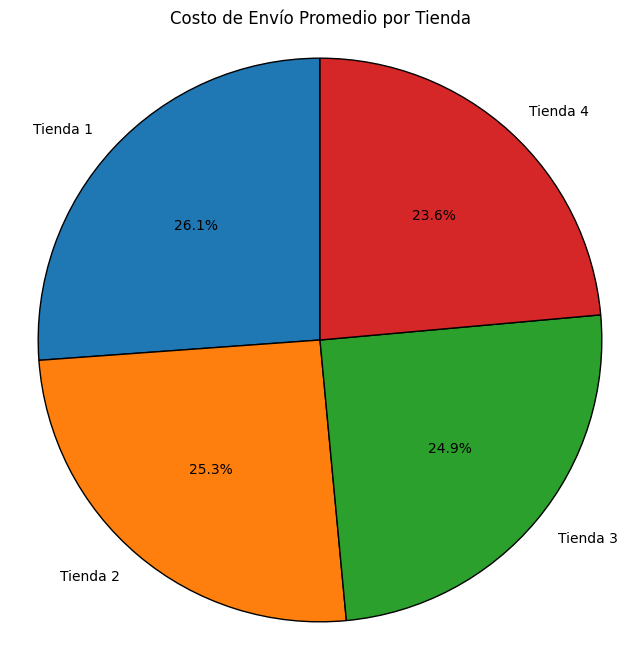

In [14]:
import matplotlib.pyplot as plt


avg_shipping_cost = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}


avg_shipping_series = pd.Series(avg_shipping_cost)


plt.figure(figsize=(8, 8))
plt.pie(avg_shipping_series, labels=avg_shipping_series.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Costo de Envío Promedio por Tienda')
plt.axis('equal')
plt.show()